# Lead Scoring Case Study

## Step 1: Importing Libraries and Data

### 1.1 Import Libraries, Suppress Warnings and Set Display

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [5]:
#Environment settings
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

### 1.2 Reading the Data

In [7]:
#Importing dataset
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Inspect the shape of the dataset
lead.shape

(9240, 37)

<strong>NOTE:</strong> The original dataframe has 9240 rows and 37 columns.

## Step 2: Data Understanding and Inspection

In [11]:
#Check summary of all numerical columns to understand the dataset better
lead.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [12]:
# Check the info to see the types of the feature variables and the null values present
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<strong>NOTE:</strong> There are **`null values`** in the dataframe.

In [14]:
#Checking for count of missing values in each column
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<strong>NOTE:</strong> There are few columns with quite a high number of missing/null values in the dataframe. We will decide accordingly on how to address them in data cleaning / data imputation step.

In [16]:
#Check for duplicate rows
print(lead.duplicated().sum())

0


<strong>NOTE:</strong> There are no duplicates in the dataframe lead. 

## Step 3: Data Cleaning & Preparation

### 3.1 Treatment for 'Select' values

As mentioned in the Problem Statement, many of the categorical variables have a level called **`'Select'`** which needs to be handled because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select. 

In [21]:
# List of columns having 'Select' as value
cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [22]:
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)

In [23]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


<strong>NOTE:</strong> Now, there are no `'Select'` values in the dataframe lead.

### 3.2 Handling Missing Values

In [26]:
# Check the percentage of missing values in each column
round(100*(lead.isnull().sum()/len(lead.index)).sort_values(ascending=False), 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### 3.2.1 Dropping Columns that have more than 40% Null Values

In [28]:
#User defined function to drop columns and know the shape before and after dropping
def dropnullcolumn(data ,percentage=40):
    
    missing_perc = 100*(lead.isnull().sum()/len(lead.index)).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",lead.shape)    
    data.drop(labels=col_to_drop,axis=1, inplace=True)   
    print("Shape after dropping columns: ",lead.shape)

In [29]:
# dropping columns using User defined function
dropnullcolumn(lead)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [30]:
# Checking the percentage of missing values in each column
round(100*(lead.isnull().sum()/len(lead.index)).sort_values(ascending=False), 2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

#### 3.2.2 Columns with Categorical Data

In [32]:
# Select the columns with non-numeric data type
categorical_cols = lead.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### Let's check the count of values in each categorical column and then decide how to treat the missing values for that particular column

In [34]:
columnsList= ['City','Specialization','Tags','What matters most to you in choosing a course', 'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*lead[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_"*40,"\n")

value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management    

#### Insights:
1) **`'City'`** column has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence we can drop this column.
2) **`'Tags'`** has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence this column can be dropped.
3) **`'What matters most to you in choosing a course'`** has 29.32 % missing values. 99.95% customers have selected 'Better Career Prospects'. This is massively skewed and will not provide any insight. Hence we can drop this column.
4) **`'What is your current occupation'`** We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.
5) **`'Country'`** X Education sells online courses and approx. 96% of the customers are from India. It does not make business sense to impute missing values with India. Hence this column can be dropped.

In [36]:
#Dropping the columns
lead.drop(['City', 'Tags', 'What matters most to you in choosing a course', 'Country'], axis = 1, inplace = True)

In [37]:
print("Shape of data after Dropping the columns",lead.shape)

Shape of data after Dropping the columns (9240, 26)


#### Imputing the column values

In [39]:
# Imputing values as per the above observations/insights
missing_values={'Specialization':'Others', 'Lead Source':'Google', 'Last Activity':'Email Opened', 'What is your current occupation':'Unemployed'}
lead=lead.fillna(value = missing_values)

In [40]:
# Rechecking the percentage of missing values in each column
round(100*(lead.isnull().sum()/len(lead.index)).sort_values(ascending=False), 2)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### 3.2.3 Columns with Numerical Data

In [42]:
print(lead['TotalVisits'].value_counts().head(10))
print('-'*20)
print(lead['Page Views Per Visit'].value_counts().head(10))

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64
--------------------
Page Views Per Visit
0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: count, dtype: int64


In [43]:
# Imputing Missing values in 'TotalVisits' & 'Page Views Per Visit' with mode value
lead['TotalVisits'] = lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0])
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0])

#### Re-checking the null values for columns

In [45]:
# Rechecking the percentage of missing values in each column
round(100*(lead.isnull().sum()/len(lead.index)).sort_values(ascending=False), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.3 Removing Unwanted Columns

In [47]:
# Last Notable Activity
print("Last Notable Activity")
print("-"*30)
100*lead['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
------------------------------


Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

#### 3.3.1  Handling columns with only one unique value

In [49]:
#check for columns with one unique value, count and freq is same
lead.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


In [50]:
# Columns with only one category of response from customer can be dropped
lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

#### 3.3.2 Dropping columns of no use for modeling

In [52]:
# Removing Prospect ID values since they are unique for everyone
lead.drop(['Prospect ID','Lead Number','Last Notable Activity'], axis = 1, inplace = True)
print(lead.shape)

(9240, 18)


### 3.4 Checking & Dropping Category Columns that are Skewed

In [54]:
# Getting the value counts of all the columns
for column in lead:
    print(lead[column].astype('category').value_counts())
    print('_'*40)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
________________________________________
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
________________________________________
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
________________________________________
Do Not Call
No     9238
Yes     

##### Now we notice that, on getting the value counts of all the columns, there are few columns in which only one value is majorly present for all the data points such as:
- 'Do Not Call'
- 'Search
- 'Newspaper Article'
- 'X Education Forums',
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'
  
Since all these variables have maximum value as 'No', it's best that we drop these columns as they won't help with our analysis.

In [56]:
lead.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [57]:
print("Shape of data after dropping the columns: ",lead.shape)

Shape of data after dropping the columns:  (9240, 11)


In [58]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


### 3.5 Outlier Analysis

#### For Numerical Columns

In [61]:
#User defined function
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)
        sns.boxplot(y=data[j])    
        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

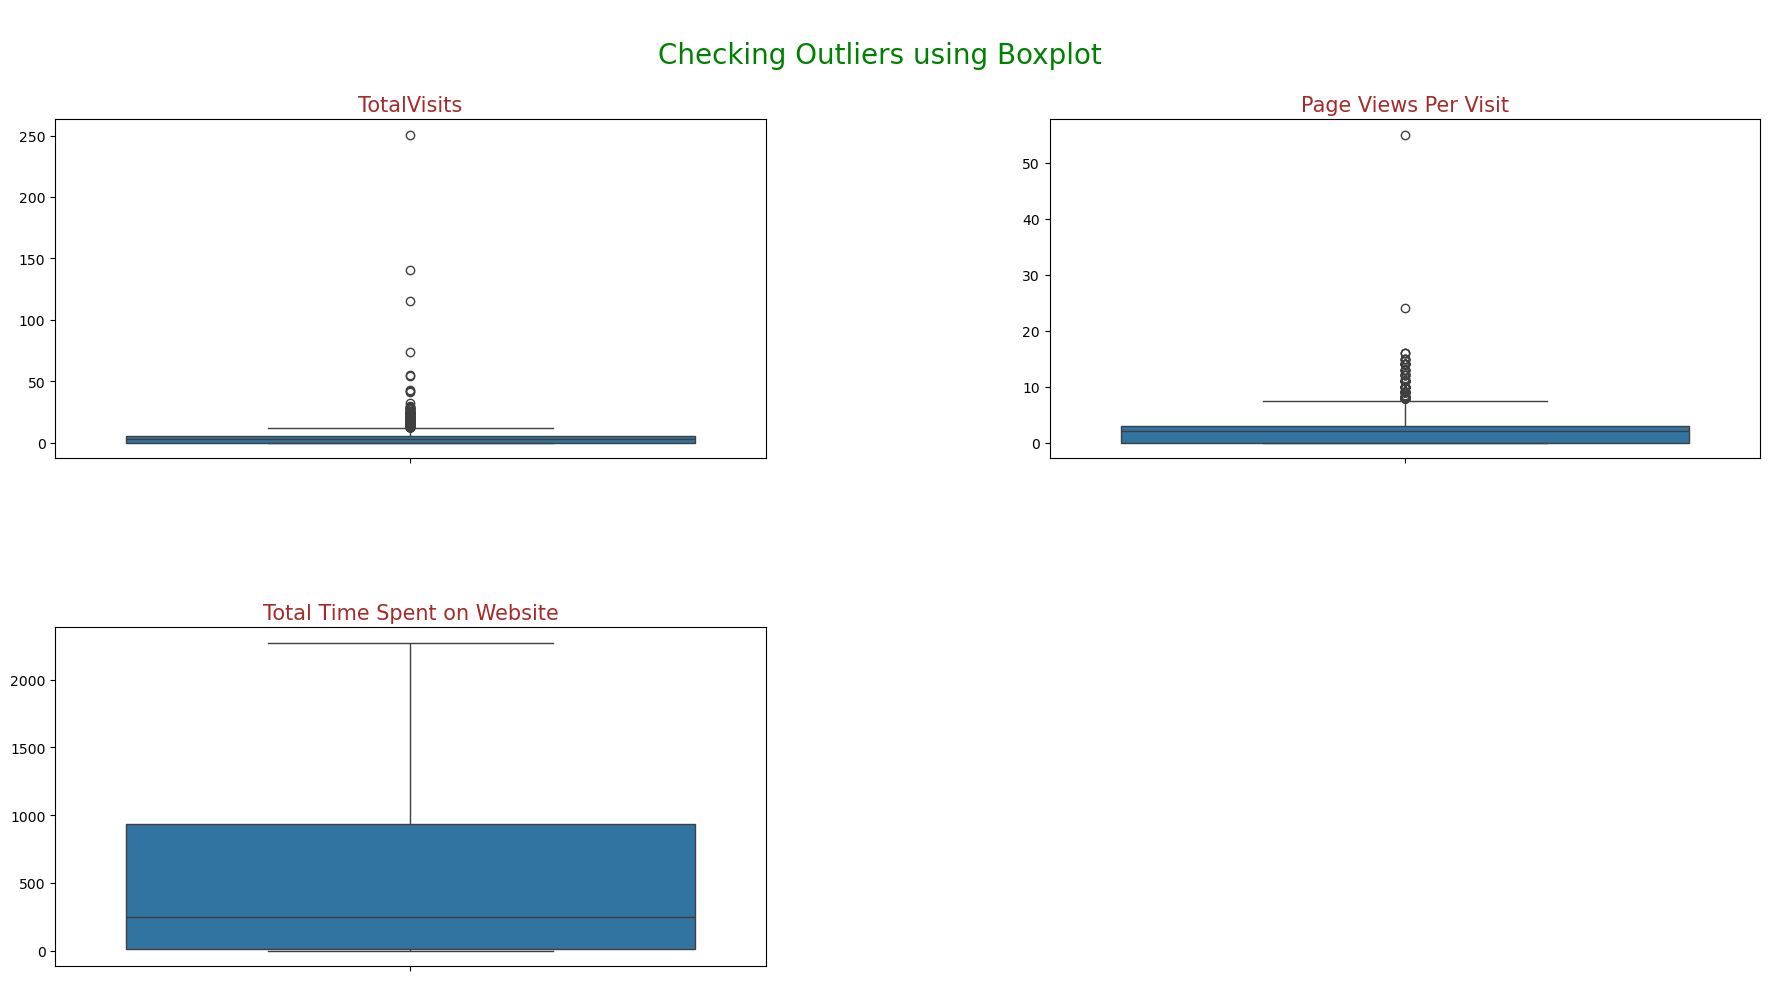

In [62]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# User defined function
Check_Outliers(lead,num_cols)

As we can see "TotalVisits", "Page Views Per Visit" both of these variables contain outliers as can be seen in the boxplot. So, these outliers needs to be treated.

#### Capping Outliers for the treatment

In [65]:
# before outlier treatment
lead.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [66]:
# Defining User defined function to treat outliers via capping and flooring
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [67]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# User defined function
Outlier_treatment(lead,capping_cols)

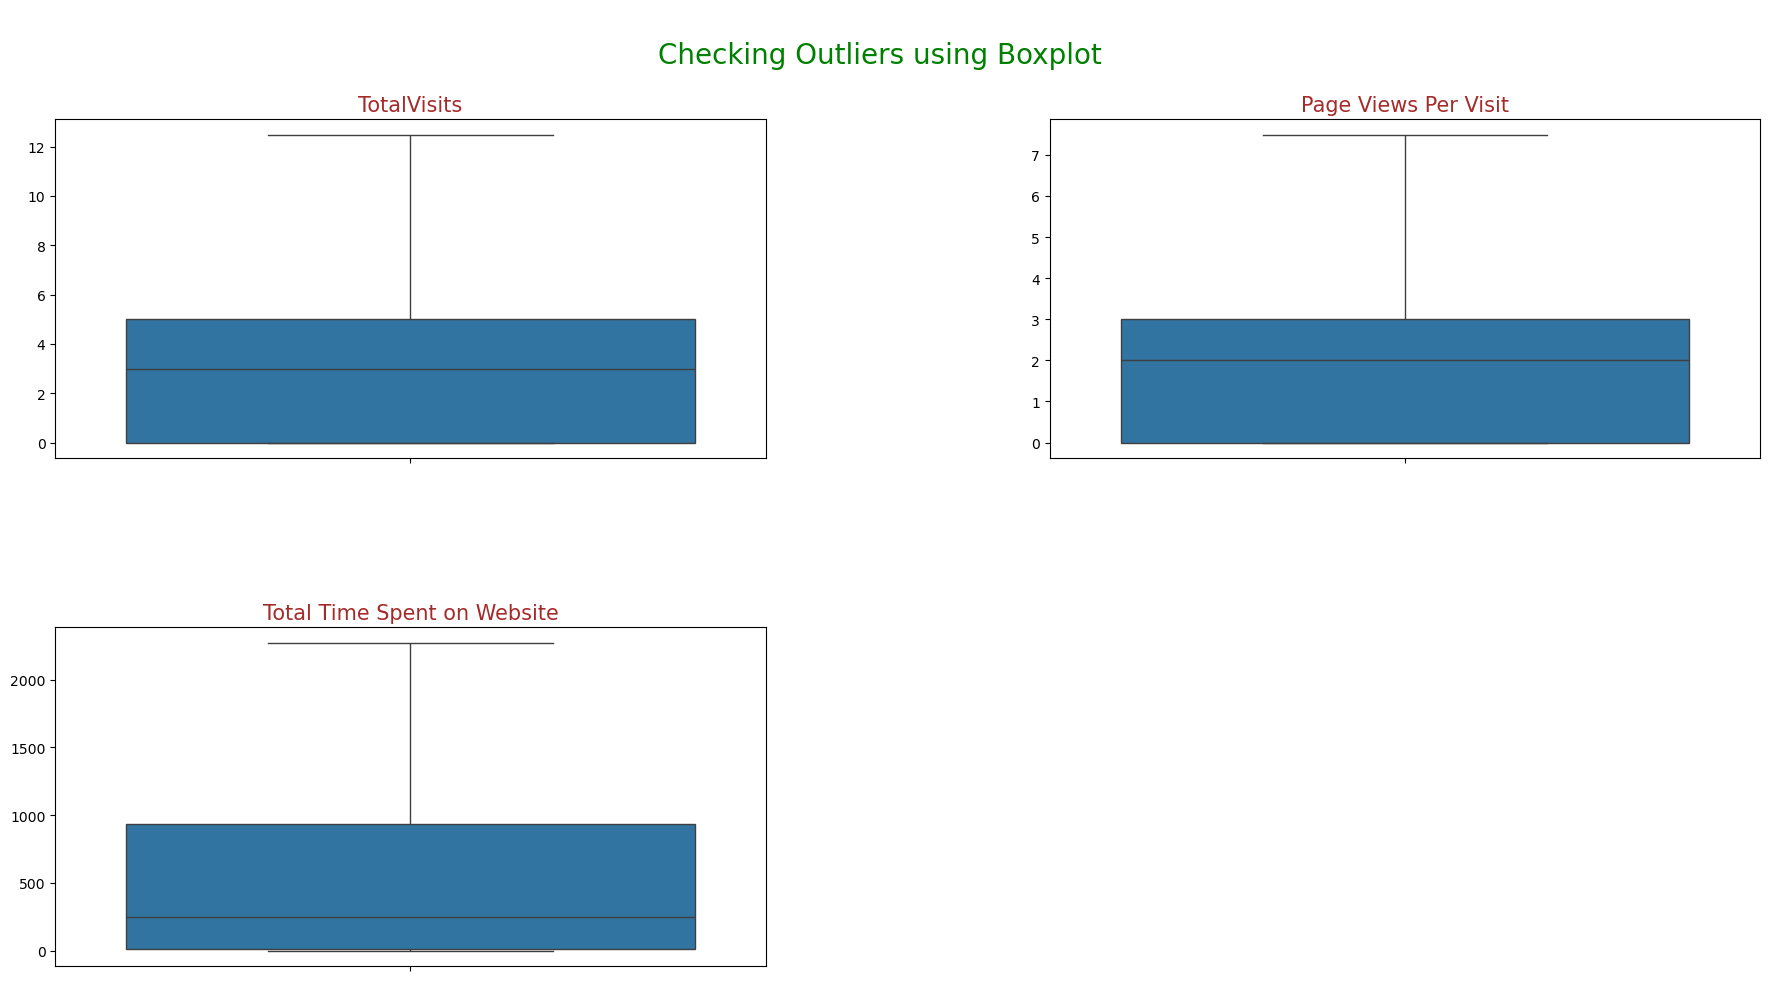

In [68]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# User defined function for boxplot
Check_Outliers(lead,num_cols)

### 3.6 Fixing Invalid values & Standardising Data in columns

In [70]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [71]:
lead.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

In [72]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization","What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*lead[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_"*40,"\n")

value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

________________________________________ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0

As we can see that some categories in the **`"Lead Source"`** and **`"Last Activity"`** columns have very few records. To prevent ending up with a bunch of unnecessary columns while creating dummy variables, it is better to group these categories together under "Others".

Also, in **`"Lead Source"`**: "Google" & "google" are same, so we will standardise it.

#### 3.6.1 Grouping Low frequency values

In [75]:
# Grouping low frequency value levels to Others
lead['Lead Source'] = lead['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
lead['Lead Source'] = lead['Lead Source'].replace("google","Google")

In [76]:
# value_counts percentage after replace
lead["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [77]:
# Grouping low frequency value levels to Others 
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [78]:
# value_counts percentage after replace
lead['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [79]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
lead.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
lead.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

As both **`"Do Not Email"`** & **`"Free_copy"`** are binary categorical columns so we will map both of them yes/no to 1/0.

#### 3.6.2 Mapping Binary categorical variables

In [82]:
# Mapping binary categorical variables (Yes/No to 1/0) 
lead['Do Not Email'] = lead['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
lead['Free_copy'] = lead['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

#### 3.6.3 Checking Data-types of variables

In [84]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


## Step 4: Data Analysis (EDA)

### 4.1 Checking if Data is Imbalanced or not
- Data imbalance is when one value is present in majority and other is in minority i.e., when there is uneven distribution of observations in dataset.
- Data imbalance is in the context of Target variable only.
- Target variable is 'Converted' which tells whether a past lead was converted or not wherein '1' means it was converted and '0' means it wasn’t converted.

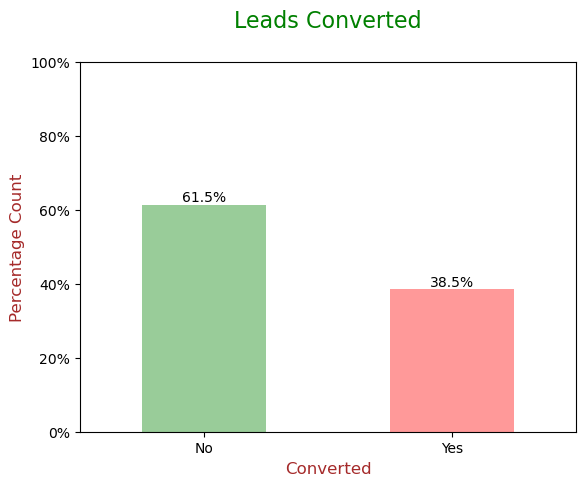

In [87]:
## ploting the results on bar plot
ax=(100*lead["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

#### Insights:
- Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

In [89]:
### Ratio of Data Imbalance
ratio=(lead["Converted"].value_counts(normalize=True).loc[0])/(lead["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### 4.2 Univariate Analysis

#### 4.2.1 Univariate Analysis for Categorical Variables

In [92]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email","Free_copy","Lead Source","Last Activity","Specialization"]

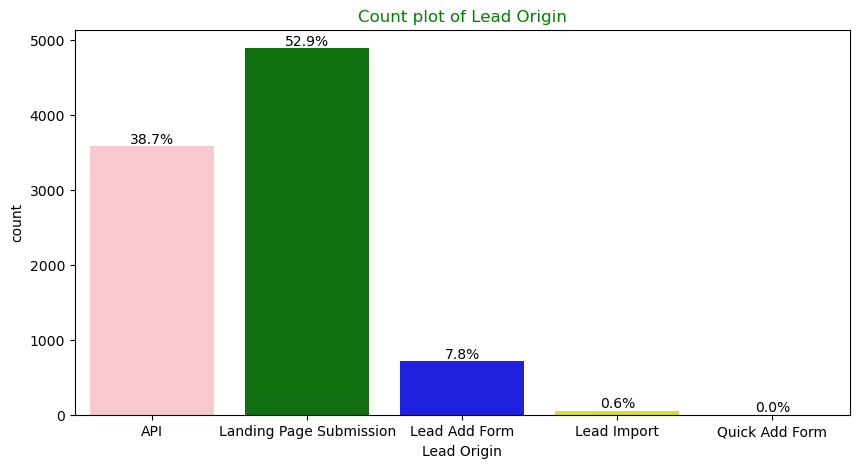

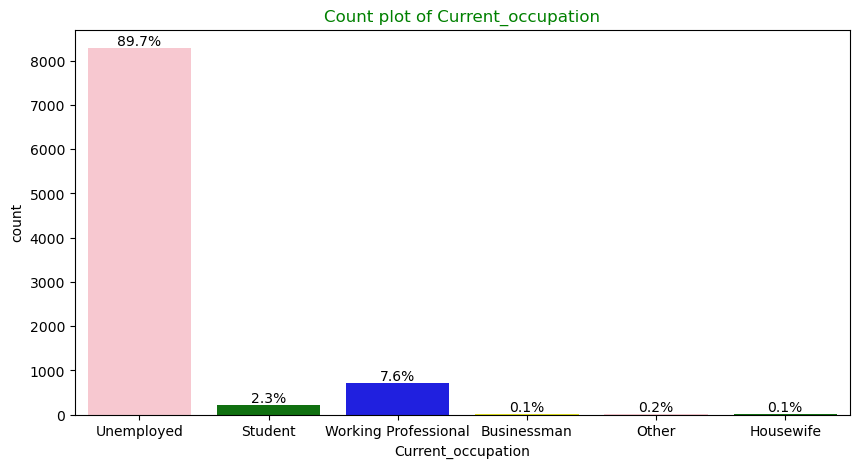

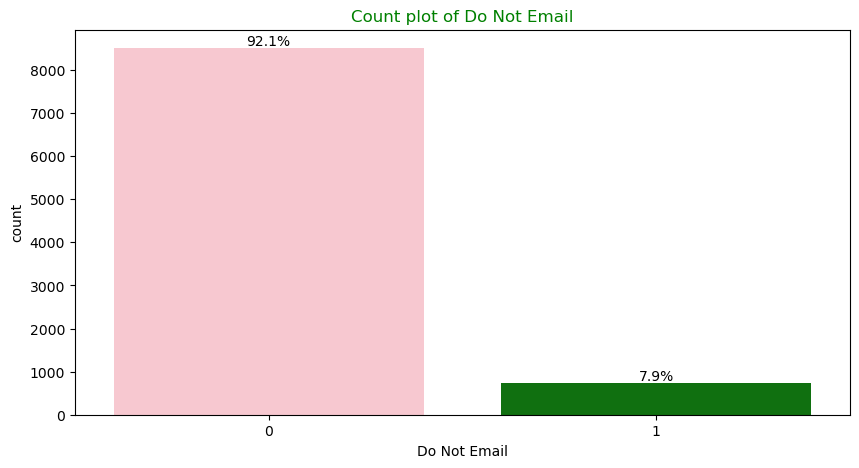

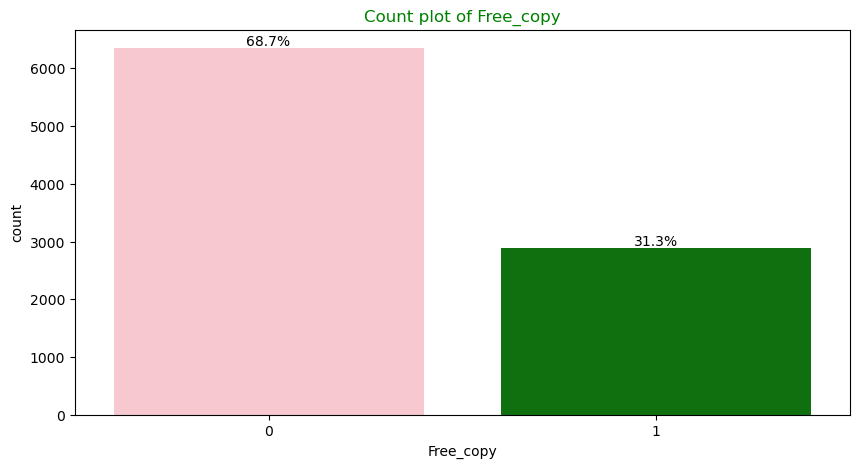

In [93]:
# Define a custom color palette with pink and green
custom_palette = ['pink', 'green', 'blue', 'yellow']

for i in cat_cols[:4]:    
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    
    # Add the custom color palette
    ax = sns.countplot(x=i, data=lead, palette=custom_palette)
    
    total = len(lead[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        # Annotate the bars with percentages
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()


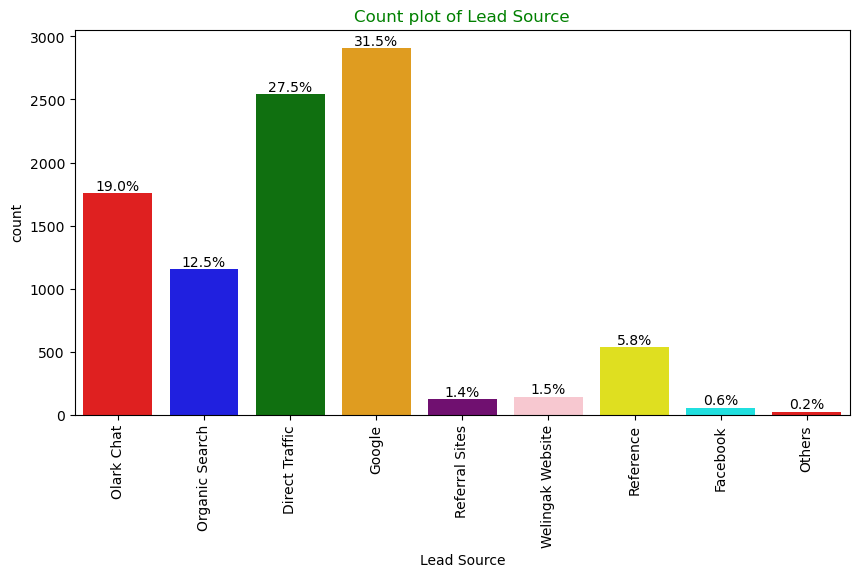

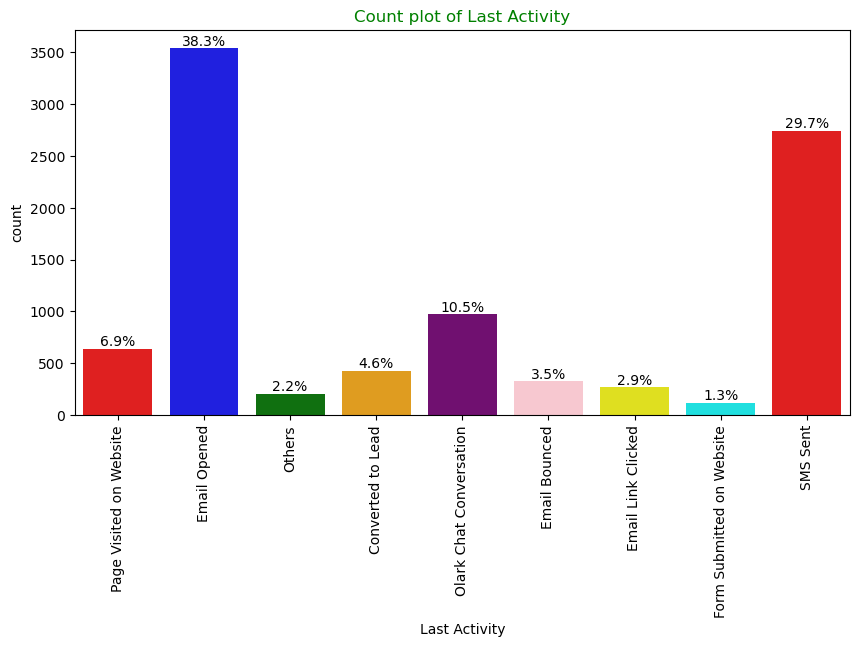

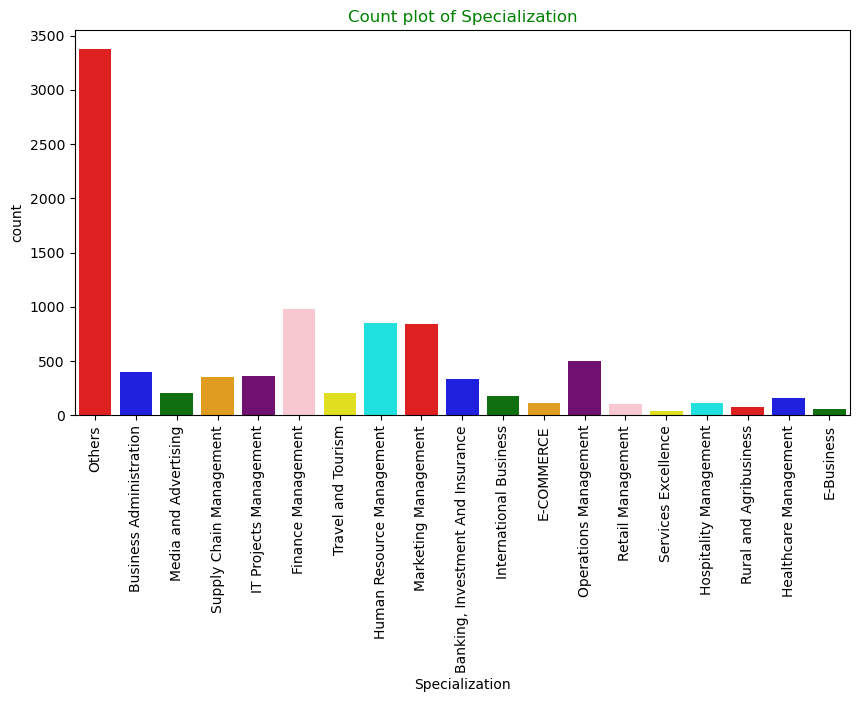

In [94]:
# Define a custom color palette (add as many colors as you want)
custom_palette = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'cyan']

# Iterate through categorical columns and create barplots
for i in cat_cols[4:]:
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    
    # Use custom palette for multicolored bars
    ax = sns.countplot(x=i, data=lead, palette=custom_palette)
    
    total = len(lead[i])
    plt.xticks(rotation=90)
    
    if i != "Specialization":  # Skip annotations for 'Specialization' column
        for p in ax.patches:
            text = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            # Annotate each bar with percentage
            ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    else:
        pass
    
    plt.show()

#### Insights Univariate:
Here is the list of features from variables which are present in majority (Converted and Not Converted included)
1) **`Lead Origin`**: "Landing Page Submission" identified 53% customers, "API" identified 39%.
2) **`Current_occupation`**: It has 90% of the customers as Unemployed
3) **`Do Not Email`**: 92% of the people has opted that they dont want to be emailed about the course.
4) **`Lead Source`**: 59% Lead source is from Google & Direct Traffic combined
5) **`Last Activity`**: 68% of customers contribution in SMS Sent & Email Opened activities

In [96]:
lead.dtypes

Lead Origin                     object
Lead Source                     object
Do Not Email                     int64
Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Last Activity                   object
Specialization                  object
Current_occupation              object
Free_copy                        int64
dtype: object

#### 4.2.2 Univariate Analysis for Numerical Variables

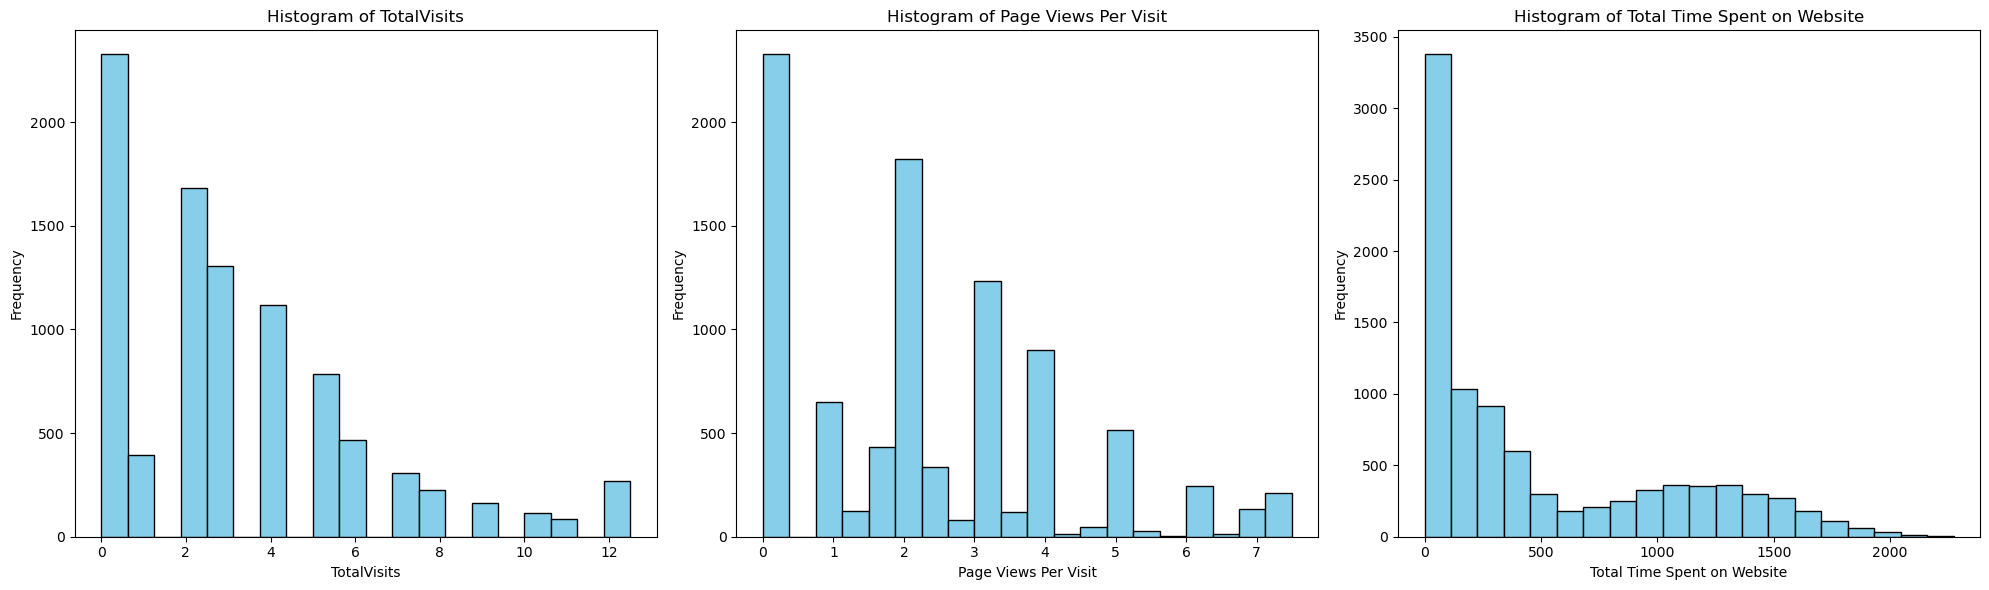

In [98]:
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]
plt.figure(figsize=(20, 6))

for idx, col in enumerate(num_cols): 
    plt.subplot(1, len(num_cols), idx + 1)  # Create subplots in one row
    plt.hist(x=lead[col], bins=20, color='skyblue', edgecolor='black')  # Adjusted to use 'x'
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### 4.3 Bivariate Analysis

#### 4.3.1 Bivariate Analysis for Categorical Variables

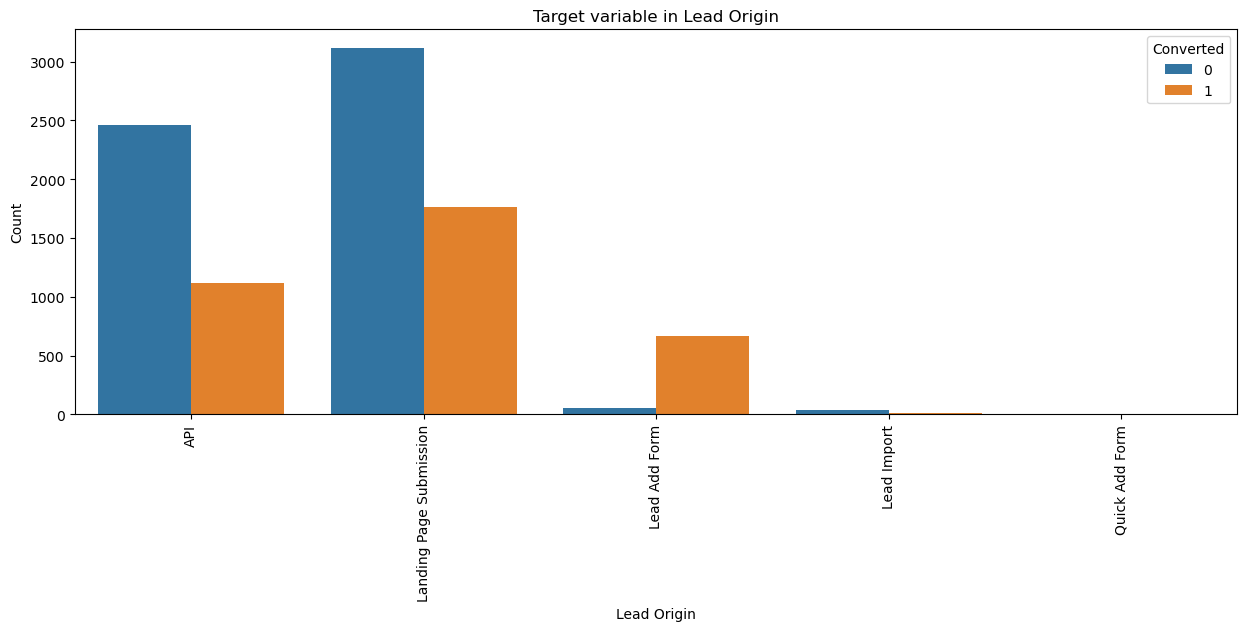

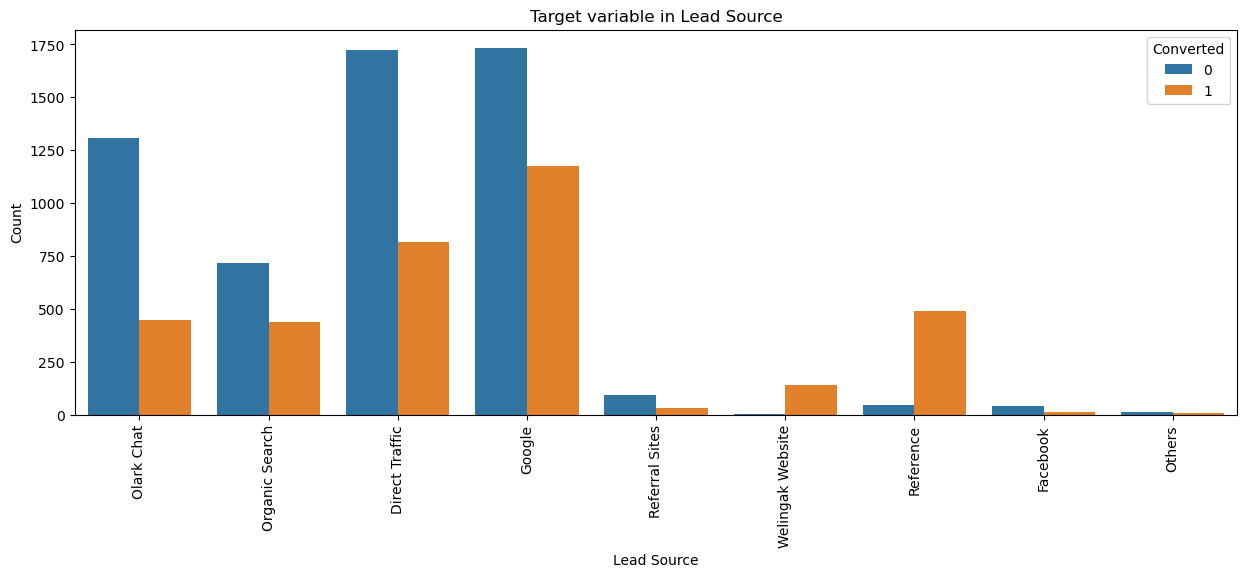

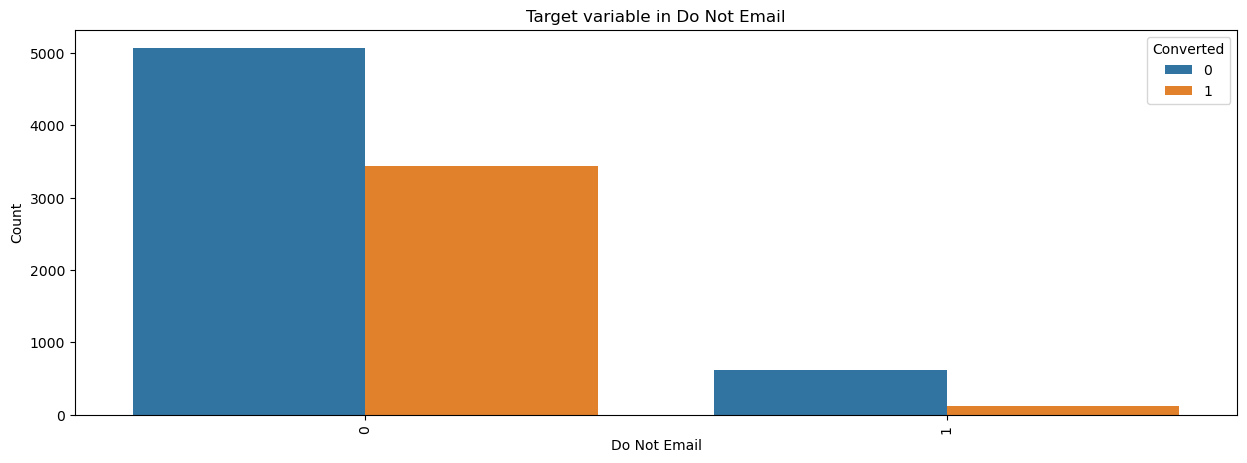

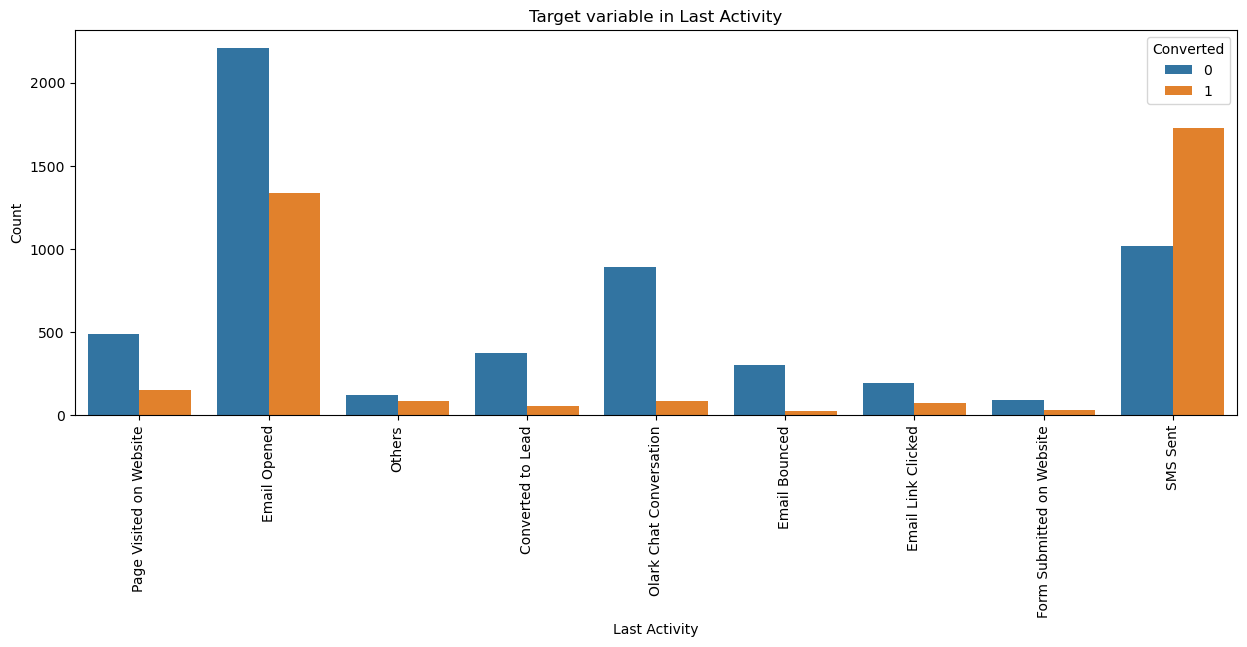

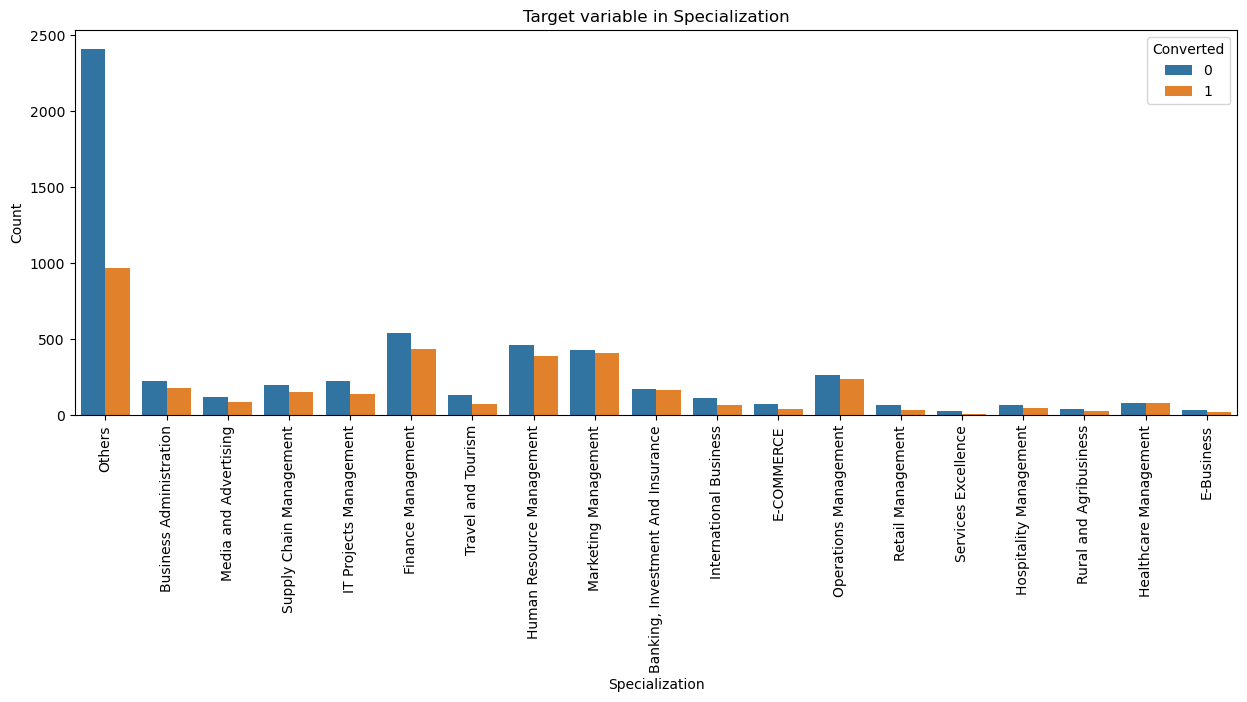

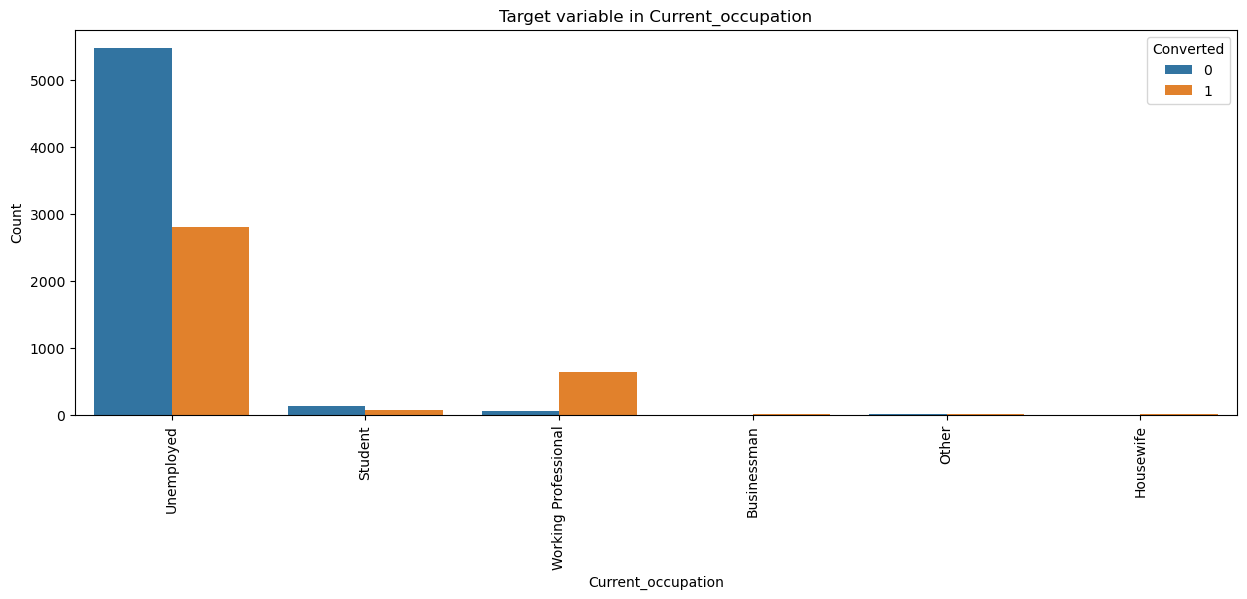

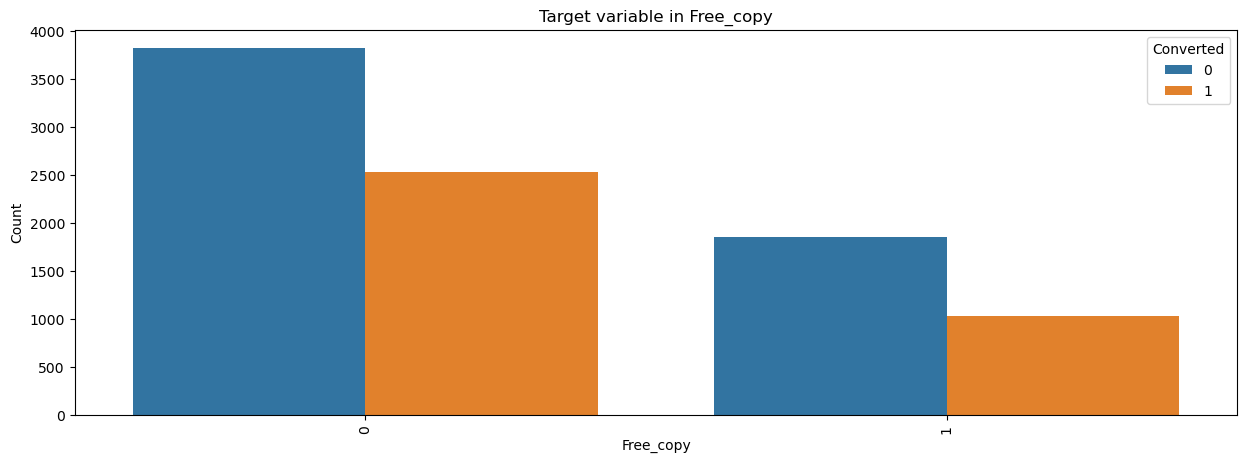

In [101]:
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin", "Lead Source", "Do Not Email",  "Last Activity", "Specialization", "Current_occupation", "Free_copy"]
# Loop through each categorical column
for i in cat_cols:
    plt.figure(figsize=(15, 5))  # Set figure size for better visuals
    sns.countplot(x=i, data=lead, hue='Converted')  # Correct hue parameter
    plt.xticks(rotation=90)  # Rotate x-ticks for readability
    plt.title(f'Target variable in {i}')  # Add title dynamically
    plt.xlabel(i)  # Set x-axis label dynamically
    plt.ylabel('Count')  # Label the y-axis
    plt.legend(title='Converted', loc='upper right')  # Add legend for clarity
    plt.show()

#### 4.3.2 Bivariate Analysis for Numerical Variables

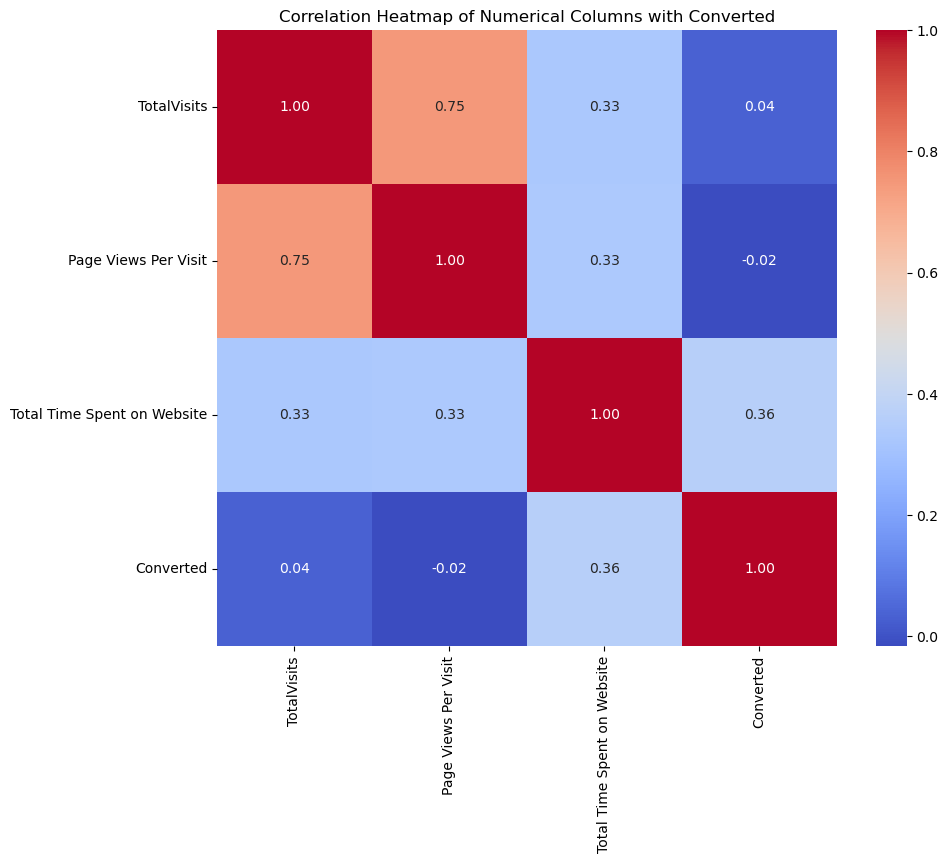

In [103]:
# Ensure that 'Converted' is numeric
lead['Converted'] = lead['Converted'].astype(int)  # Converts to integer if not already

# Selecting numerical columns and target variable
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]
selected_cols = num_cols + ['Converted']
data = lead[selected_cols]  # Subset data with the required columns

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # Heatmap
plt.title("Correlation Heatmap of Numerical Columns with Converted")
plt.show()

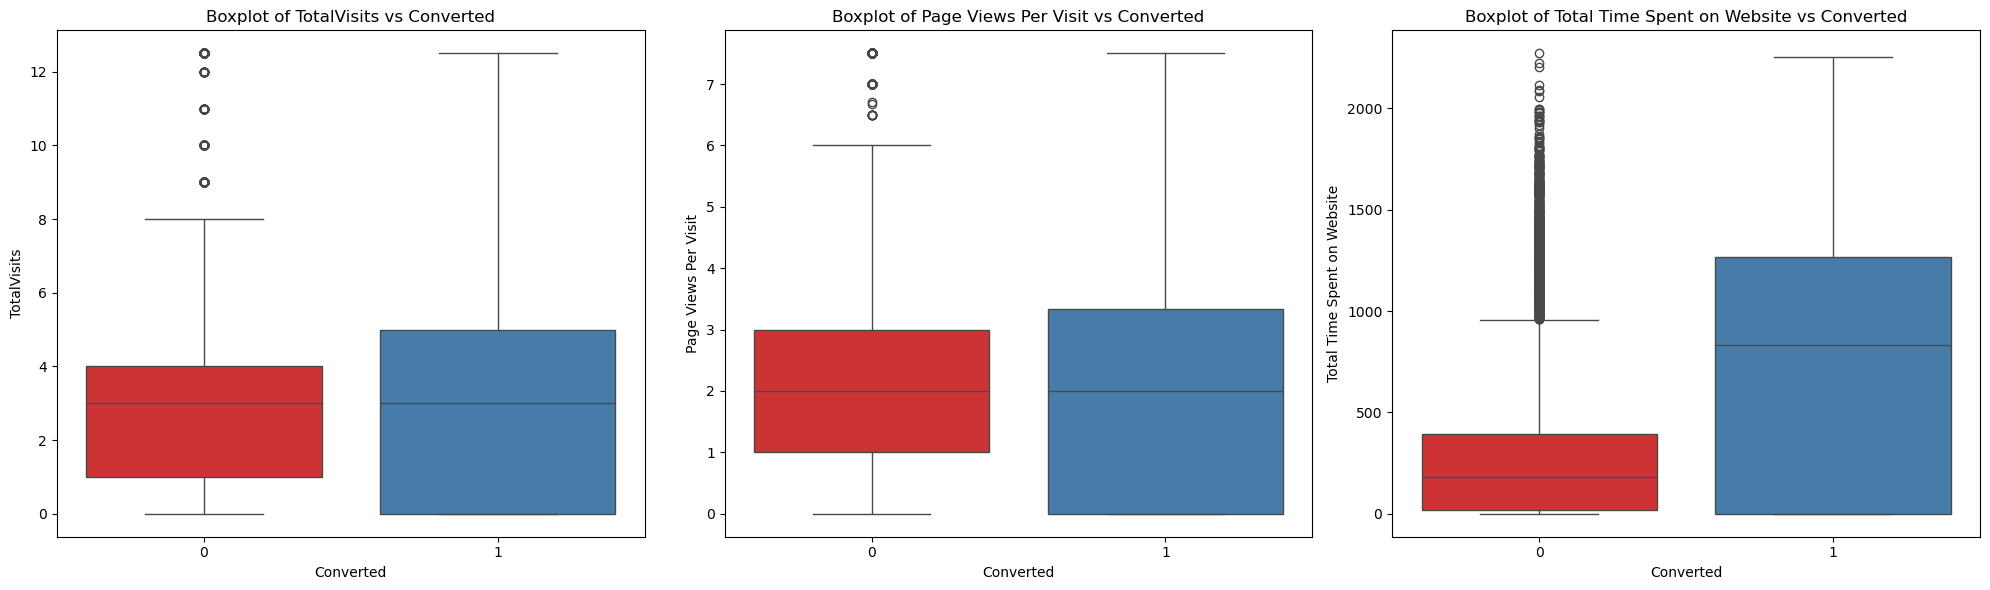

In [104]:
# List of numerical columns
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 6))  # Adjust figure size for proper spacing

# Loop through each column and corresponding subplot
for idx, col in enumerate(num_cols):
    sns.boxplot(y=col, x='Converted', data=lead, palette='Set1', ax=axes[idx])  # Assign plot to each subplot
    axes[idx].set_title(f"Boxplot of {col} vs Converted")
    axes[idx].set_xlabel("Converted")
    axes[idx].set_ylabel(col)

plt.tight_layout()  # Prevent overlapping
plt.show()

#### Inference:
1) **`'Total Visits'`**: Median for converted and not converted leads are the same.
2) **`'Page Views Per Visit'`**: Median for converted and unconverted leads is the same.
3) **`'Total Time Spent on Website'`**: Leads spending more time on the website are more likely to be converted. Therefore, a engaging Website might help in making more leads.

## Step 5: Data Preparation

### 5.1 Dummy Variables

Binary level categorical columns are already mapped to 1 / 0 in previous steps. So, we will start with Dummy variable creation.

In [109]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int32  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 758.1+ KB


In [110]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True, dtype=int)

# Add the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)

In [111]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [112]:
# We have created dummies for the below variables, so we can drop them

lead = lead.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"], axis=1)

In [113]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [114]:
lead.shape

(9240, 49)

In [115]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int32  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   int32  
 7   Lead Origin_Lead Add Form                 9240 non-null   int32  
 8   Lead Origin_Lead Import                   9240 non-null   int32  
 9   Lead Origin_Quick Add Form                9240 non-null   int32  
 10  Lead Source_Facebook                

## Step 6: Test-Train Split

In [117]:
# Putting predictor variables to X
X = lead.drop('Converted', axis=1)

# Putting Target variables to y
y = lead["Converted"]


In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [119]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [120]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## Step 7: Feature Scaling

In [122]:
lead.dtypes

Do Not Email                                  int64
Converted                                     int32
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Free_copy                                     int64
Lead Origin_Landing Page Submission           int32
Lead Origin_Lead Add Form                     int32
Lead Origin_Lead Import                       int32
Lead Origin_Quick Add Form                    int32
Lead Source_Facebook                          int32
Lead Source_Google                            int32
Lead Source_Olark Chat                        int32
Lead Source_Organic Search                    int32
Lead Source_Others                            int32
Lead Source_Reference                         int32
Lead Source_Referral Sites                    int32
Lead Source_Welingak Website                  int32
Last Activity_Email Bounced                   int32
Last Activit

In [123]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [124]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Feature elimination based on correlations

In [126]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(lead['Converted'])/len(lead['Converted'].index))*100
LCR

38.53896103896104

<strong>NOTE:</strong> We have 38.5% Conversion Rate

### 7.1 Looking at Correlations

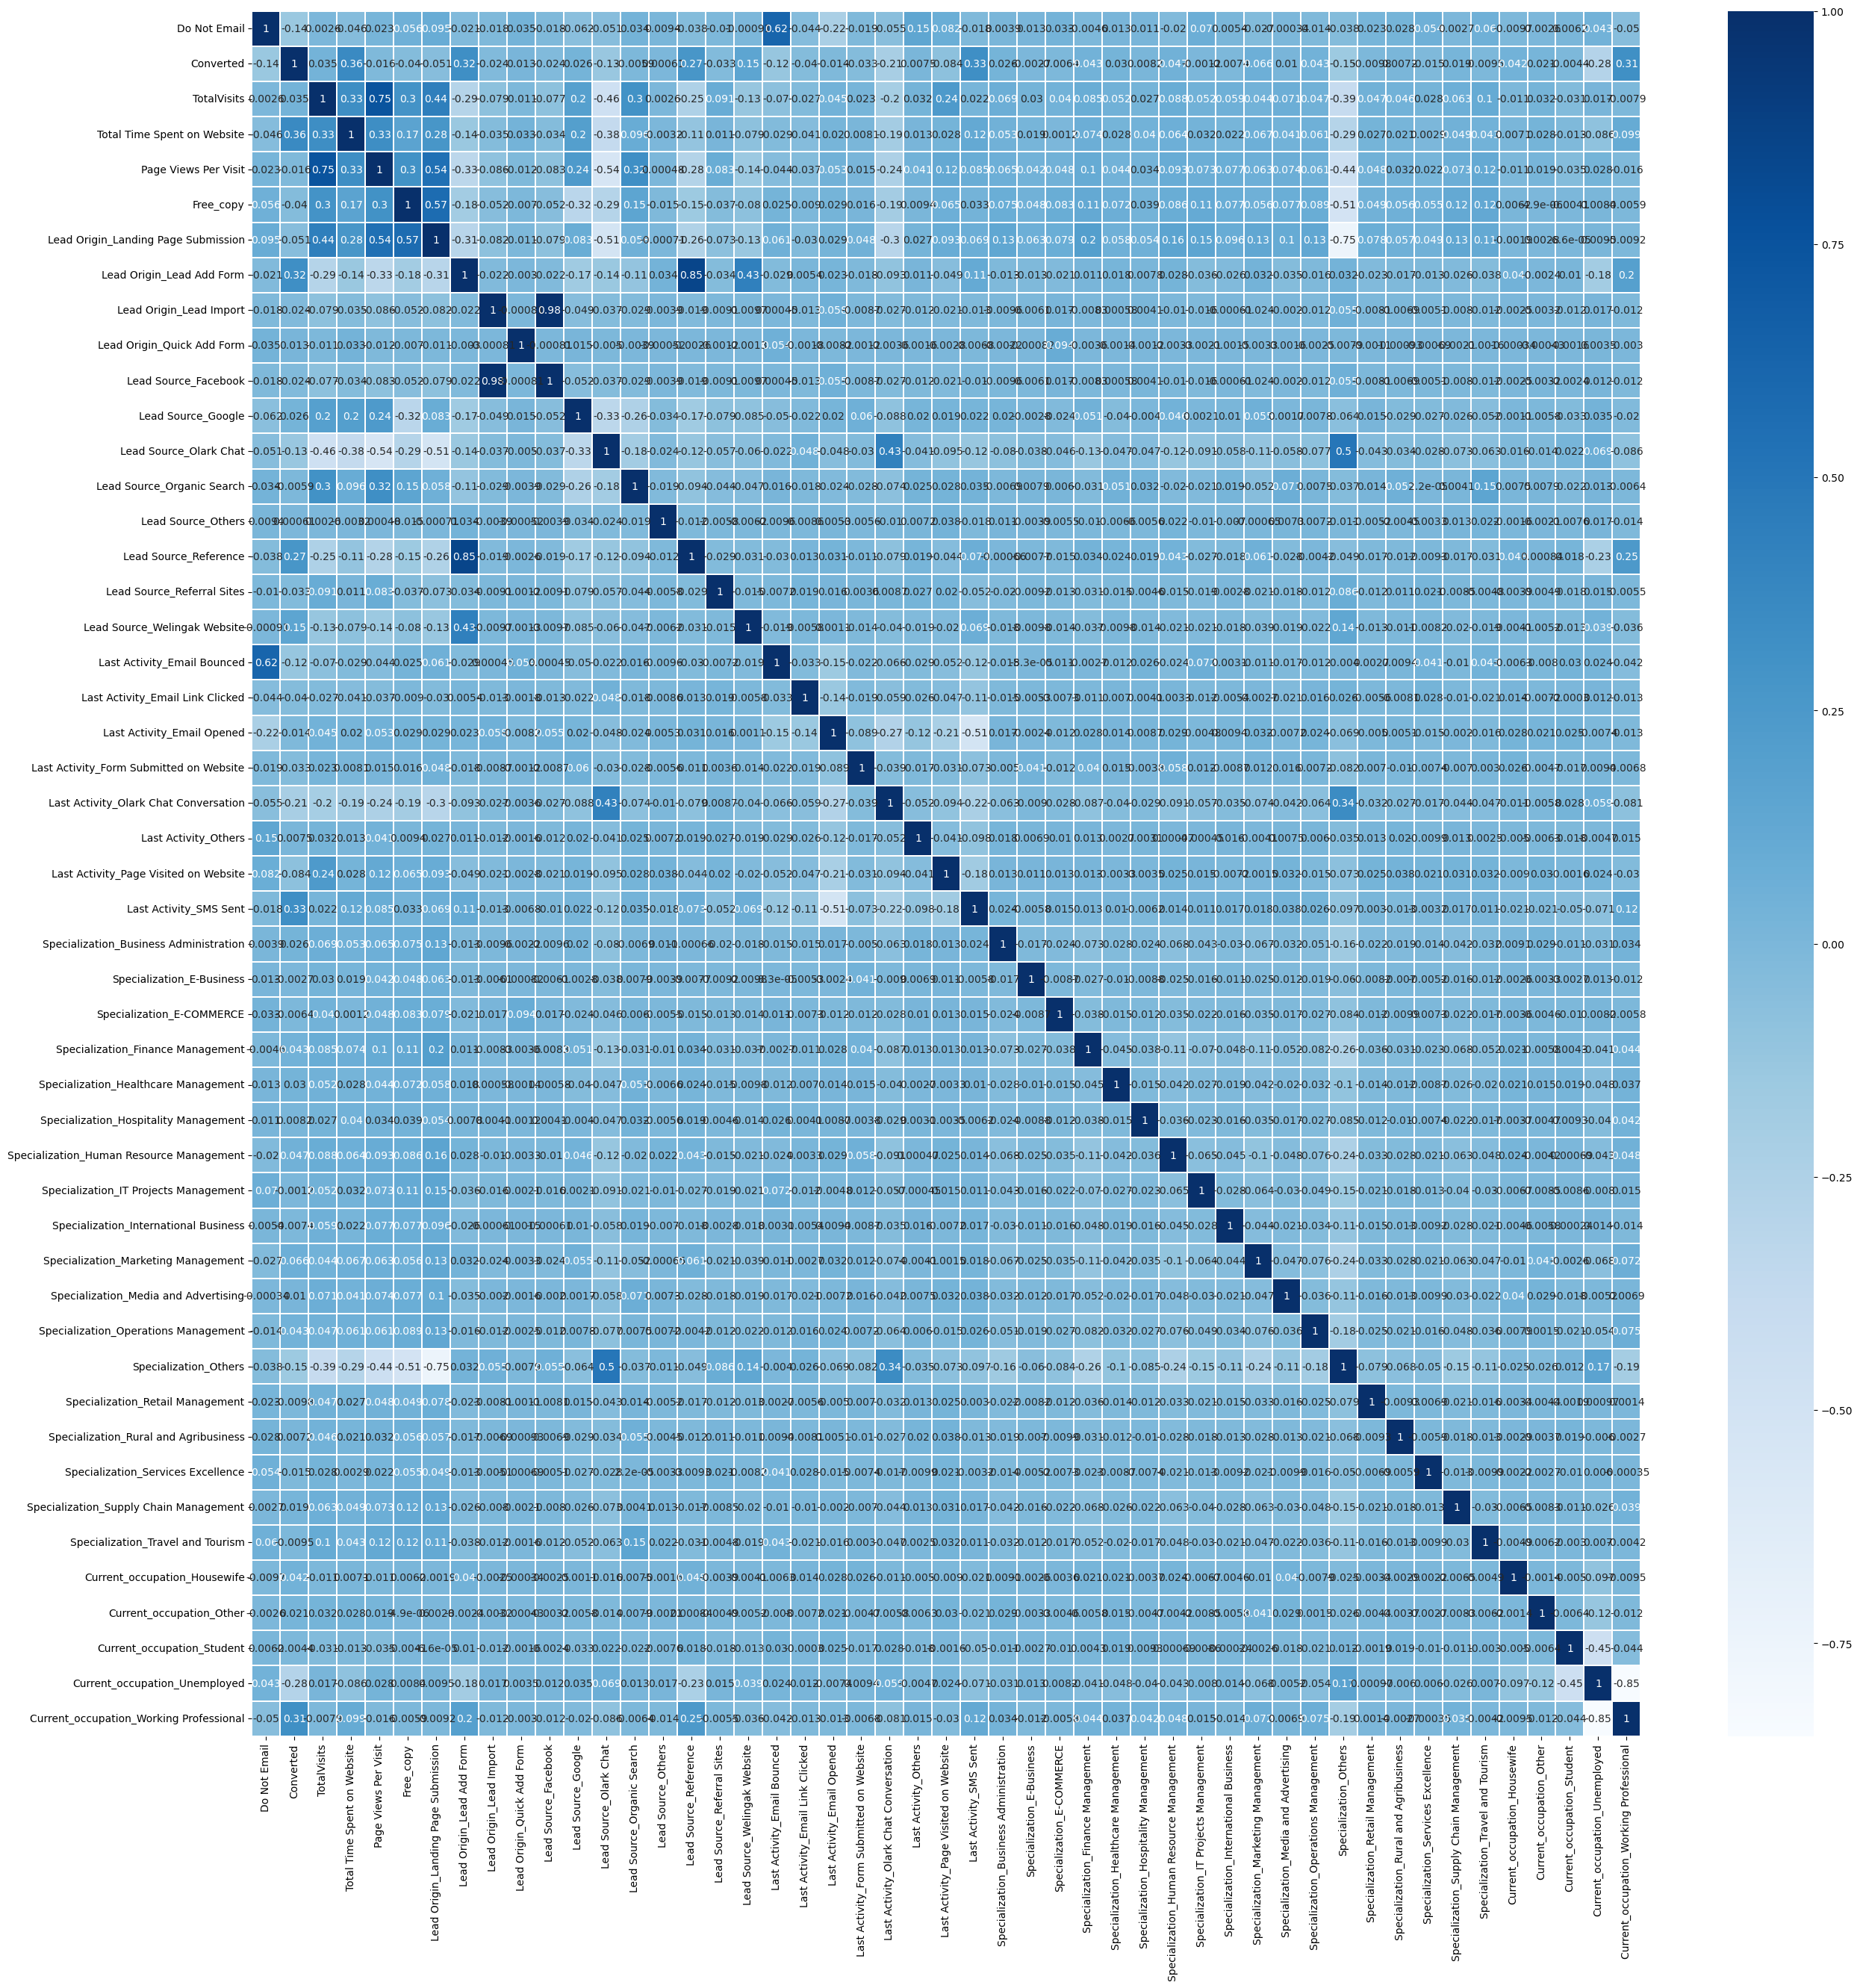

In [129]:
# analyse correlation matrix
plt.figure(figsize = (30,30))        
sns.heatmap(lead.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

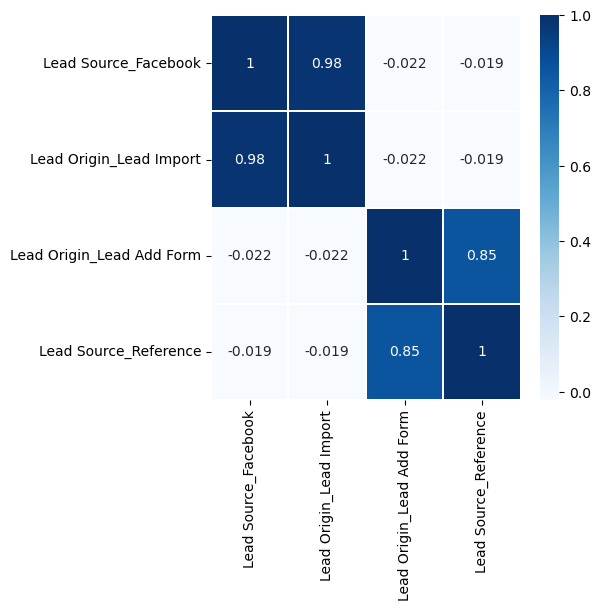

In [130]:
# As the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(lead[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

These predictor variables are highly correlated with each other near diagonal with (0.98 and 0.85), so we can drop one of these variables from each pair as they won’t add much value to the model. Lets drop **`'Lead Origin_Lead Import'`** and **`'Lead Origin_Lead Add Form'`**.

In [132]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis=1)

## Step 8: Model Building

- We will Build Logistic Regression Model for predicting categorical variable.
- Feature Selection Using RFE (Coarse tuning).
- Manual fine-tuning using p-values and VIF value.

### 8.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [136]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [137]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 25),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False

In [138]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
42,Current_occupation_Other,True,1
41,Current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
44,Current_occupation_Unemployed,True,1
20,Last Activity_Others,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1


In [139]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife', 'Current_occupation_Other',
       'Current_occupation_Unemployed',
       'Current_occupation_Working Professional'],
      dtype='object')

In [140]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specializati

In [141]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [143]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  
print(logm1.params)  # Parameters of the model
print(logm1.summary())  # Detailed statistical summary

const                                      -0.766438
Total Time Spent on Website                 1.056525
Lead Origin_Landing Page Submission        -1.247888
Lead Source_Olark Chat                      0.853136
Lead Source_Others                          0.992741
Lead Source_Reference                       2.920749
Lead Source_Welingak Website                5.452110
Last Activity_Email Opened                  1.094111
Last Activity_Others                        1.407190
Last Activity_SMS Sent                      2.218673
Specialization_Hospitality Management      -1.094169
Specialization_Others                      -1.206772
Current_occupation_Housewife               22.629504
Current_occupation_Other                   -0.508627
Current_occupation_Unemployed              -0.430605
Current_occupation_Working Professional     2.278461
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations: 

<strong>NOTE:</strong> **`"Current_occupation_Housewife"`** column will be removed from model due to **high p-value of 0.999**, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2

In [146]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [147]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

print(logm2.params)  # Parameters of the model
print(logm2.summary())  # Detailed statistical summary

const                                     -0.597706
Total Time Spent on Website                1.055811
Lead Origin_Landing Page Submission       -1.244384
Lead Source_Olark Chat                     0.849169
Lead Source_Others                         0.990700
Lead Source_Reference                      2.930760
Lead Source_Welingak Website               5.454618
Last Activity_Email Opened                 1.092875
Last Activity_Others                       1.402192
Last Activity_SMS Sent                     2.213947
Specialization_Hospitality Management     -1.102394
Specialization_Others                     -1.210170
Current_occupation_Other                  -0.678237
Current_occupation_Unemployed             -0.597047
Current_occupation_Working Professional    2.109406
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Resi

<strong>NOTE:</strong> **`'Current_occupation_Other'`** column will be removed from model due to **high p-value of 0.422**, which is above the accepted threshold of 0.05 for statistical significance.

### Model 3

In [150]:
# Dropping 'Current_occupation_Other' column
rfe_col=rfe_col.drop("Current_occupation_Other")

In [151]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

print(logm3.params)  # Parameters of the model
print(logm3.summary())  # Detailed statistical summary

const                                     -0.648154
Total Time Spent on Website                1.054783
Lead Origin_Landing Page Submission       -1.242297
Lead Source_Olark Chat                     0.850399
Lead Source_Others                         0.991431
Lead Source_Reference                      2.932880
Lead Source_Welingak Website               5.453737
Last Activity_Email Opened                 1.094606
Last Activity_Others                       1.404259
Last Activity_SMS Sent                     2.215775
Specialization_Hospitality Management     -1.099757
Specialization_Others                     -1.207657
Current_occupation_Unemployed             -0.550296
Current_occupation_Working Professional    2.156674
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:       

<strong>NOTE:</strong> **`'Lead Source_Others'`** column will be removed from model due to **high p-value of 0.054**, which is above the accepted threshold of 0.05 for statistical significance.

### Model 4

In [154]:
# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [155]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit() 

print(logm4.params)  # Parameters of the model
print(logm4.summary())  # Detailed statistical summary

const                                     -0.634662
Total Time Spent on Website                1.052727
Lead Origin_Landing Page Submission       -1.252139
Lead Source_Olark Chat                     0.840831
Lead Source_Reference                      2.921056
Lead Source_Welingak Website               5.445346
Last Activity_Email Opened                 1.092641
Last Activity_Others                       1.408024
Last Activity_SMS Sent                     2.211349
Specialization_Hospitality Management     -1.103818
Specialization_Others                     -1.216820
Current_occupation_Unemployed             -0.545866
Current_occupation_Working Professional    2.154867
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                       

#### Model 4 shows significant p-values within the threshold (p-values < 0.05), so let's check VIF values now in order to see if there is any multicollinearity which exists among the independent variables.

In [157]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Current_occupation_Unemployed,10.62
1,Lead Origin_Landing Page Submission,5.75
2,Specialization_Others,3.95
3,Last Activity_Email Opened,2.26
4,Last Activity_SMS Sent,2.14
5,Lead Source_Olark Chat,2.05
6,Current_occupation_Working Professional,1.77
7,Lead Source_Reference,1.46
8,Total Time Spent on Website,1.25
9,Lead Source_Welingak Website,1.09


<strong>NOTE:</strong> **`'Current_occupation_Unemployed'`** column will be removed from model due to **high VIF value of 10.62**, which is above the accepted threshold of 5.00 for statistical significance.

### Model 5

In [160]:
# Dropping 'Current_occupation_Unemployed' column
rfe_col=rfe_col.drop("Current_occupation_Unemployed")

In [161]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit() 

print(logm5.params)  # Parameters of the model
print(logm5.summary())  # Detailed statistical summary

const                                     -1.162453
Total Time Spent on Website                1.052744
Lead Origin_Landing Page Submission       -1.252478
Lead Source_Olark Chat                     0.847741
Lead Source_Reference                      2.939560
Lead Source_Welingak Website               5.435592
Last Activity_Email Opened                 1.093192
Last Activity_Others                       1.397112
Last Activity_SMS Sent                     2.200131
Specialization_Hospitality Management     -1.100072
Specialization_Others                     -1.221746
Current_occupation_Working Professional    2.684966
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale

In [162]:
# Now rechecking VIFs for all variables in the Model 5 
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.18
1,Specialization_Others,2.12
2,Last Activity_Email Opened,2.00
3,Last Activity_SMS Sent,1.93
4,Lead Source_Olark Chat,1.86
5,Lead Source_Reference,1.29
6,Total Time Spent on Website,1.24
7,Current_occupation_Working Professional,1.20
8,Lead Source_Welingak Website,1.08
9,Last Activity_Others,1.06


<strong>NOTE:</strong> No variable needs to be dropped as they all have good VIF values less than 5.
- p-values for all variables is less than 0.05.
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 5 for Model Evaluation.

## Step 9: Model Evaluation

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [166]:
# Getting the predicted values on the train set
y_train_pred = logm5.predict(X_train_sm5)

y_train_pred[:10]

1871    0.461678
6795    0.073273
3516    0.236647
8105    0.772490
3934    0.201759
4844    0.988241
3297    0.110065
8071    0.996256
987     0.148506
7423    0.869279
dtype: float64

In [167]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46167797, 0.07327293, 0.23664679, 0.77248999, 0.20175923,
       0.98824129, 0.11006506, 0.99625645, 0.14850568, 0.86927914])

In [168]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from lead dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.461678,1871
1,0,0.073273,6795
2,0,0.236647,3516
3,0,0.772490,8105
4,0,0.201759,3934


Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities.

In [170]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.461678,1871,0
1,0,0.073273,6795,0
2,0,0.236647,3516,0
3,0,0.772490,8105,1
4,0,0.201759,3934,0


### 9.1 Confusion matrix

In [172]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3587  415]
 [ 849 1617]]


### 9.2 Accuracy

In [174]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8045763760049475


### 9.3 Sensitivity and Specificity

In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6557177615571776


In [178]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8963018490754623


In [179]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10369815092453773


In [180]:
# positive predictive value 
print (TP / float(TP+FP))

0.7957677165354331


In [181]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8086113615870153


### 9.4 Plotting the ROC Curve

An ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [184]:
# User defined function to draw ROC curve 
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [185]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

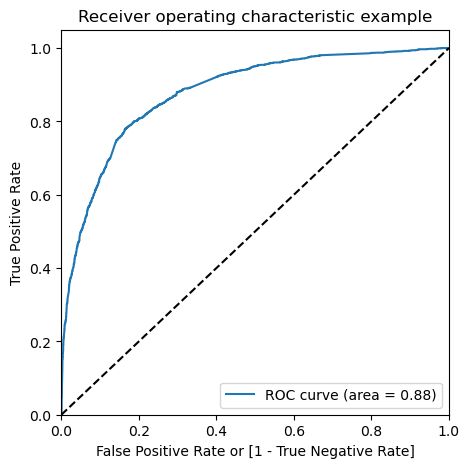

In [186]:
# Drawing ROC curve for Train Set
draw_roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong>NOTE:</strong> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

#### 9.4.1 Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [189]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.461678,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073273,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.236647,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.772490,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.201759,3934,0,1,1,1,0,0,0,0,0,0,0


In [190]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i, accuracy, sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.595857     0.974858     0.362319
0.2          0.2  0.721707     0.922141     0.598201
0.3          0.3  0.791280     0.832117     0.766117
0.4          0.4  0.812771     0.762368     0.843828
0.5          0.5  0.804576     0.655718     0.896302
0.6          0.6  0.794372     0.588402     0.921289
0.7          0.7  0.778602     0.507299     0.945777
0.8          0.8  0.753865     0.405921     0.968266
0.9          0.9  0.707328     0.246959     0.991004


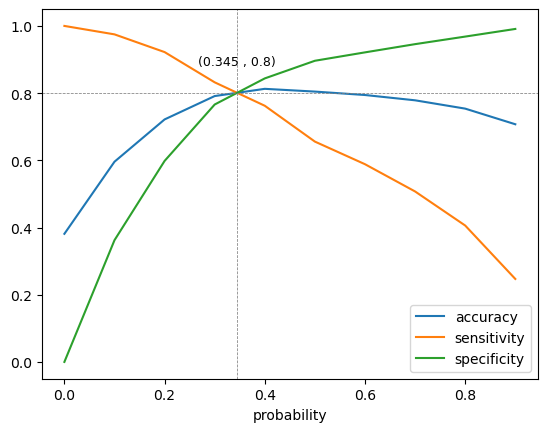

In [191]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['probability'], cutoff_df['sensitivity'], kind='linear')
acc_interp = interp1d(cutoff_df['probability'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['probability'], cutoff_df['specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

<strong>NOTE:</strong> 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our `Optimal cutoff point` for probability threshold .
- Let's do mapping again using optimal cutoff point.

In [193]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.461678,1871,1
1,0,0.073273,6795,0
2,0,0.236647,3516,0
3,0,0.772490,8105,1
4,0,0.201759,3934,0


### Calculating all metrics using confusion matrix for Train

In [195]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8047309833024119


In [196]:
# User defined function for all Logistic Regression Metrics
def logreg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensitivity,4))
    print ("Model Specificity                : ", round(specificity,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [197]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using User defined function to calculate all metrices of logistic regression
logreg_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3229  773]
 [ 490 1976]] 

************************************************** 

True Negative                    :  3229
True Positive                    :  1976
False Negative                   :  490
False Positve                    :  773
Model Accuracy                   :  0.8047
Model Sensitivity                :  0.8013
Model Specificity                :  0.8068
Model Precision                  :  0.7188
Model Recall                     :  0.8013
Model True Positive Rate (TPR)   :  0.8013
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



### 9.5 Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [199]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

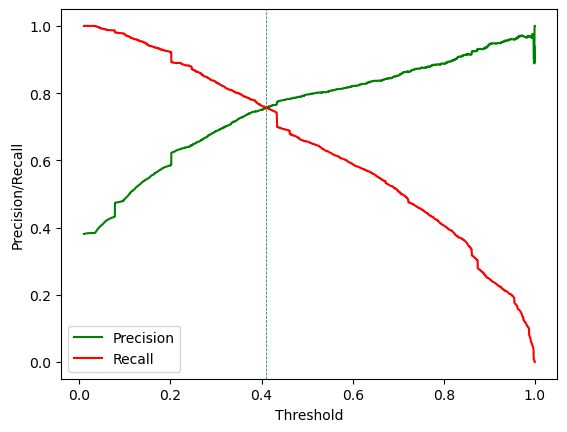

In [200]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()


<strong>NOTE:</strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [202]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [203]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.461678,1871,1,1
1,0,0.073273,6795,0,0
2,0,0.236647,3516,0,0
3,0,0.772490,8105,1,1
4,0,0.201759,3934,0,0


In [204]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view
# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using User Defined function to calculate all metrices of logistic regression
logreg_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3403  599]
 [ 604 1862]] 

************************************************** 

True Negative                    :  3403
True Positive                    :  1862
False Negative                   :  604
False Positve                    :  599
Model Accuracy                   :  0.814
Model Sensitivity                :  0.7551
Model Specificity                :  0.8503
Model Precision                  :  0.7566
Model Recall                     :  0.7551
Model True Positive Rate (TPR)   :  0.7551
Model False Positive Rate (FPR)  :  0.1497


************************************************** 



<strong> NOTE: </strong>
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### <strong><span> Adding `Lead Score` Feature to Training dataframe </span></strong> 
- A higher score would mean that the lead is most likely to convert.
- Whereas a lower score would mean that the lead will mostly not get converted.

In [207]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.461678,1871,1,46
1,0,0.073273,6795,0,7
2,0,0.236647,3516,0,24
3,0,0.772490,8105,1,77
4,0,0.201759,3934,0,20


## Step 10: Making Predictions on test set

### 10.1 Scaling Test dataset

In [210]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   int32  
 6   Lead Origin_Quick Add Form                2772 non-null   int32  
 7   Lead Source_Facebook                      2772 non-null   int32  
 8   Lead Source_Google                        2772 non-null   int32  
 9   Lead Source_Olark Chat                    2772 non-null   int32  
 10  Lead Source_Organic Search            

In [211]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0


### 10.2 Prediction on Test Dataset using final model

In [213]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 12)

In [214]:
# making prediction using model 5 (final model)
y_test_pred = logm5.predict(X_test_sm)

In [215]:
# top 10 columns
y_test_pred[:10]

4269    0.696631
2376    0.860976
7766    0.891020
9199    0.078094
4359    0.874158
9186    0.507999
1631    0.424944
8963    0.153574
8007    0.063902
5324    0.301815
dtype: float64

In [216]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.696631
2376,0.860976
7766,0.891020
9199,0.078094
4359,0.874158


In [217]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [218]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.696631
1,1,2376,0.860976
2,1,7766,0.891020
3,0,9199,0.078094
4,1,4359,0.874158


In [219]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.696631
1,2376,1,0.860976
2,7766,1,0.891020
3,9199,0,0.078094
4,4359,1,0.874158


In [220]:
# taking sensitivity-specificity method at 0.337 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.696631,1
1,2376,1,0.860976,1
2,7766,1,0.891020,1
3,9199,0,0.078094,0
4,4359,1,0.874158,1


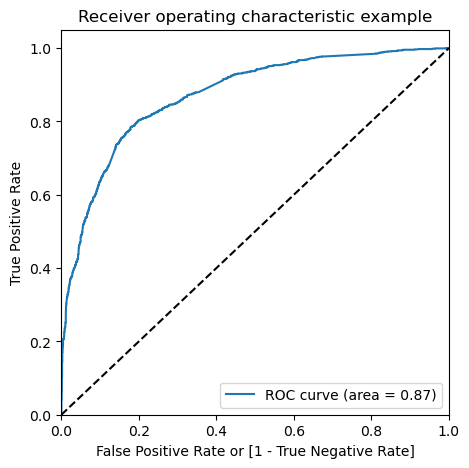

In [221]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong>NOTE:</strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

### 10.3 Test set Model Evaluation

- Calculating all metrics using confusion matrix for Test set

In [226]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using User defined function to calculate all metrices of logistic regression
logreg_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1348  329]
 [ 221  874]] 

************************************************** 

True Negative                    :  1348
True Positive                    :  874
False Negative                   :  221
False Positve                    :  329
Model Accuracy                   :  0.8016
Model Sensitivity                :  0.7982
Model Specificity                :  0.8038
Model Precision                  :  0.7265
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1962


************************************************** 



In [227]:
# features and their coefficicent from final model
parameters=logm5.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.435592
Lead Source_Reference                      2.939560
Current_occupation_Working Professional    2.684966
Last Activity_SMS Sent                     2.200131
Last Activity_Others                       1.397112
Last Activity_Email Opened                 1.093192
Total Time Spent on Website                1.052744
Lead Source_Olark Chat                     0.847741
Specialization_Hospitality Management     -1.100072
const                                     -1.162453
Specialization_Others                     -1.221746
Lead Origin_Landing Page Submission       -1.252478
dtype: float64

<strong>NOTE:</strong> A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

## Adding Lead Score Feature to Test dataframe

- A higher score would mean that the lead is most likely to convert
- Whereas a lower score would mean that the lead will mostly not get converted.

In [231]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.696631,1,70
1,2376,1,0.860976,1,86
2,7766,1,0.891020,1,89
3,9199,0,0.078094,0,8
4,4359,1,0.874158,1,87


Lead Score: Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance.
- The customers with a lower lead score have a lower conversion chance.

## Conclusion
📌 Train - Test

Train Data Set:
- Accuracy: 80.47%
- Sensitivity: 80.13%
- Specificity: 80.68%

Test Data Set:
- Accuracy: 80.16%
- Sensitivity: 79.82% ≈ 80%
- Specificity: 80.38%

<strong>NOTE:</strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 80.13%` in the train set and 79.82% in the test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.47%, which is in line with the study's objectives.

## Model parameters
The final Logistic Regression Model has 11 features.

### Top 3 features that contributing positively to predicting hot leads in the model are:
- Lead Source_Welingak Website
- Lead Source_Reference
- Current_occupation_Working Professional

<strong>NOTE:</strong> The Optimal cutoff probability point is 0.345.Converted probability greater than 0.345 will be predicted as Converted lead (Hot lead) & probability smaller than 0.345 will be predicted as not Converted lead (Cold lead).

## Recommendations:
To increase our Lead Conversion Rates:
- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.

## To identify areas of improvement:
- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.